# Reuter News Classification with LSTM

In [1]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 1s 0us/step


In [4]:
print('# of Train dataset: {}'.format(len(X_train)))
print('# of Test dataset : {}'.format(len(X_test)))

# of Train dataset: 8982
# of Test dataset : 2246


In [5]:
num_classes = max(y_train) + 1
print('# of Categories : {}'.format(num_classes))

# of Categories : 46


In [7]:
X_train[4]

[1,
 8295,
 111,
 8,
 25,
 166,
 40,
 638,
 10,
 436,
 22,
 265,
 9,
 621,
 575,
 1080,
 4742,
 1149,
 15874,
 6,
 438,
 8295,
 13,
 102,
 388,
 15,
 90,
 67,
 7,
 197,
 8295,
 8,
 4,
 270,
 416,
 23,
 527,
 6,
 15874,
 4891,
 4,
 1055,
 742,
 16,
 8,
 36,
 1480,
 6,
 2124,
 100,
 543,
 5,
 645,
 362,
 6,
 2912,
 4,
 49,
 8,
 15874,
 976,
 124,
 20,
 5,
 8295,
 80,
 9,
 100,
 362,
 543,
 395,
 61,
 44,
 20,
 8295,
 8,
 16,
 40,
 1276,
 42,
 1436,
 166,
 415,
 6,
 888,
 4,
 116,
 9,
 40,
 3089,
 4,
 303,
 163,
 16,
 64,
 772,
 13,
 94,
 156,
 17,
 12]

MAX news length :2376
AVG news length :145.5398574927633


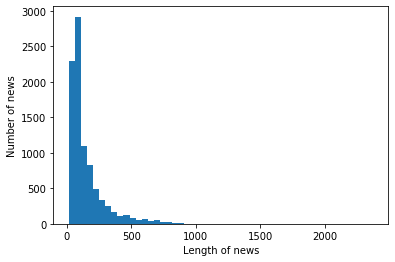

In [8]:
print('MAX news length :{}'.format(max(len(l) for l in X_train)))
print('AVG news length :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of news')
plt.ylabel('Number of news')
plt.show()

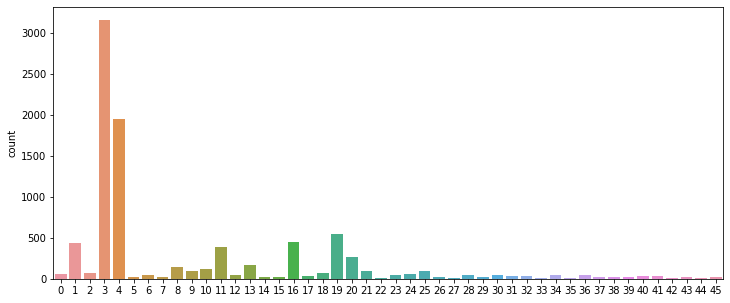

In [9]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [10]:
word2index = reuters.get_word_index()

557056/550378 [==============================] - 0s 1us/step


In [11]:
index2word = {}
for key, value in word2index.items():
    index2word[value] = key

In [15]:
# 20번째로 많이 등장한 단어
index2word[19]

'from'

## 2. Text Classification with LSTM

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

등장 빈도가 1,000번째 까지의 단어들 만을 사용

In [17]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [18]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len) 

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test) 

In [20]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

### train model

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 45s 5ms/sample - loss: 2.5350 - accuracy: 0.3625 - val_loss: 2.0720 - val_accuracy: 0.4947
Epoch 2/20
8982/8982 [==============================] - 41s 5ms/sample - loss: 2.2446 - accuracy: 0.4572 - val_loss: 1.9955 - val_accuracy: 0.4942
Epoch 3/20
8982/8982 [==============================] - 40s 4ms/sample - loss: 1.9199 - accuracy: 0.4994 - val_loss: 1.9713 - val_accuracy: 0.4929
Epoch 4/20
8982/8982 [==============================] - 43s 5ms/sample - loss: 1.9471 - accuracy: 0.4787 - val_loss: 1.9949 - val_accuracy: 0.4942
Epoch 5/20
8982/8982 [==============================] - 45s 5ms/sample - loss: 1.8125 - accuracy: 0.5369 - val_loss: 1.7507 - val_accuracy: 0.5476
Epoch 6/20
8982/8982 [==============================] - 46s 5ms/sample - loss: 1.7367 - accuracy: 0.5488 - val_loss: 1.7148 - val_accuracy: 0.5632
Epoch 7/20
8982/8982 [==============================] - 44s 5ms/sample

### test accuracy

In [23]:
model.evaluate(X_test, y_test)[1]

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.69590384

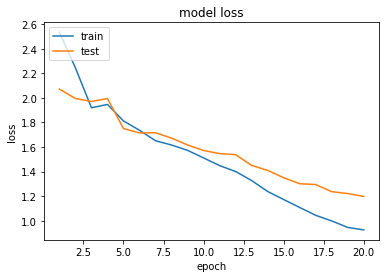

In [24]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()